# Introduction

This first notebook allows to download all necessary data for the tutorial. This allows the user to get ready with their own data in order to later use the tutorial to analyze their own data.

Note that this tutorial uses `Path` objects to handle file paths. This is a very convenient way to handle file paths in Python. If you are not familiar with `Path` objects, you can read the [official documentation](https://docs.python.org/3/library/pathlib.html).

In [73]:
from pathlib import Path

import obspy

import covseisnet as csn

## Download the data

In [75]:
# Set the download path for the data
filepath = Path("data/undervolc.mseed").absolute()
filepath.parent.mkdir(exist_ok=True)

# Download the data
csn.data.download_undervolc_data(filepath_destination=filepath)

# Check stream
stream = csn.read(filepath)

15 Trace(s) in NetworkStream (synced):
YA.UV01.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV02.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV03.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV04.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV05.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV06.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV07.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV08.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV09.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV10.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-

## Download data inventory

In [76]:
filepath = Path("data/undervolc.xml").absolute()

inventory = stream.download_inventory(datacenter="RESIF")
inventory.write(filepath, "stationxml")

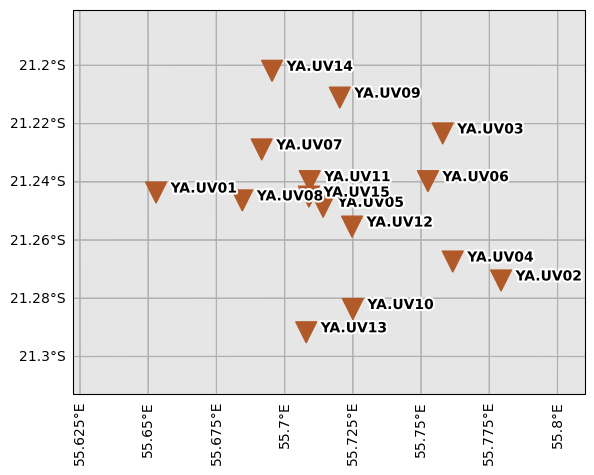

In [77]:
inventory = obspy.read_inventory(filepath)
fig = inventory.plot(projection="local", show=False)
ax = fig.axes[0]
gridlines = ax.gridlines(draw_labels=True)
gridlines.top_labels = False
gridlines.right_labels = False

## Check that the inventory can be assigned to the stream

In [78]:
stream.assign_coordinates(inventory)

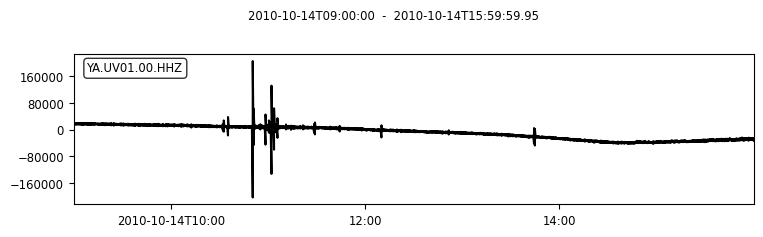

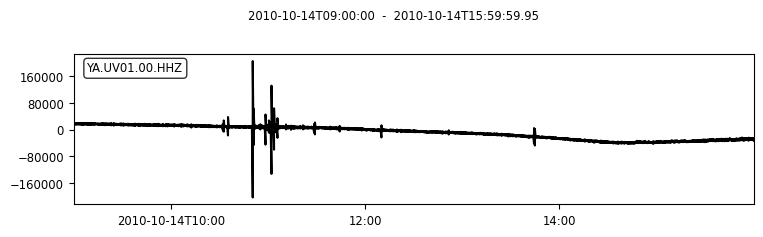

In [79]:
stream[0].plot()

In [109]:
import h5py as h5

filepath_model = Path("data/velocity_model_Mordret2025.h5").absolute()

with h5.File(filepath, mode="r") as fin:
    if field_name not in fin:
        print(f"Could not find {field_name} in {filepath}.")
        return
    # !!!!!!!! here we assume that the coordinates along
    #          each axis are sorted in increasing order !!!!!!!!
    longitude = np.unique(fin["longitude"][()])
    latitude = np.unique(fin["latitude"][()])
    depth = np.unique(fin["depth"][()])
    velocity = fin[field_name][()]

In [ ]:

model = csn.velocity.VelocityModel3D.read_from_hdf5(
    field_name="Vs",
    filepath=filepath_model,
    axis_labels=["latitude", "longitude", "depth"],
)

print(model)

{'xy': <Axes: label='xy', ylabel='Latitude (º)'>,
 'zy': <Axes: label='zy', xlabel='Depth (km)'>,
 'xz': <Axes: label='xz', xlabel='Longitude (º)', ylabel='Depth (km)'>,
 'cb': <Axes: label='cb'>}

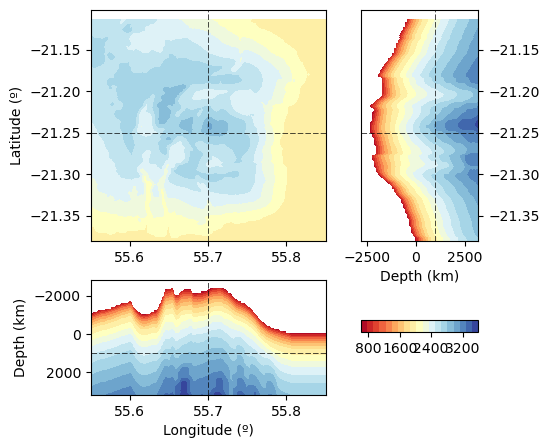

In [108]:
csn.plot.grid3d(model, profile_coordinates=[55.7, -21.25, 1000], cmap="RdYlBu")